In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from pathlib import Path
import string
import matplotlib.image as mpimg

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
image_directory = r'C:\Users\tblon\Downloads\asl\asl_alphabet_train\asl_alphabet_train'

alphabet = list(string.ascii_uppercase)
alphabet.append('space')

directories = {}

for char in alphabet:
    path = os.path.join(image_directory,char)
    directories.setdefault(char,path)

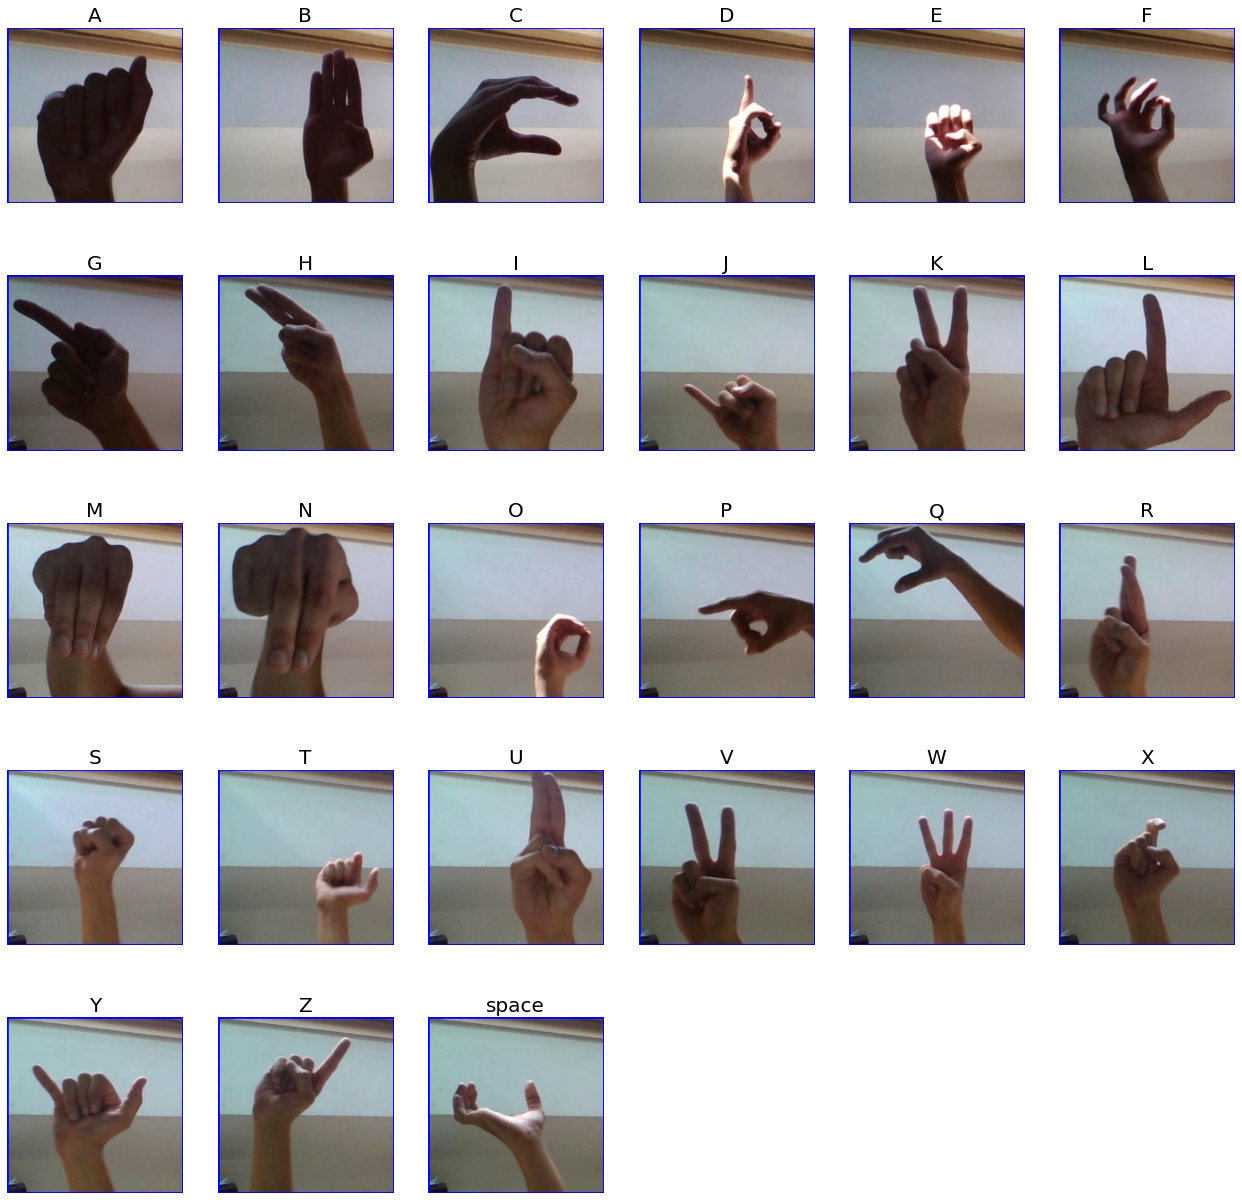

In [3]:
fig = plt.figure(figsize = (22,22))

num = random.randint(0,3000)

for char in range(len(alphabet)):
    
    letter = alphabet[char]
    img_path = image_directory + f'\\{letter}\\{letter}{num}.jpg'
    img = mpimg.imread(img_path)
    
    fig.add_subplot(5,6,char+1)
    plt.imshow(img)
    plt.title(letter,fontdict = {'fontsize':20})
    plt.axis('off')
    
plt.show()

In [4]:
data_generator = ImageDataGenerator(rescale = 1/255,
                                   rotation_range = 20,
                                   horizontal_flip = False,
                                   width_shift_range = .2,
                                   height_shift_range = .2,
                                    fill_mode = 'nearest',
                                   shear_range = .2,
                                   validation_split = .03)

batches = 20

train_data = data_generator.flow_from_directory(image_directory,
                                               target_size = (150,150),
                                               class_mode = 'categorical',
                                               batch_size = batches,
                                                subset = 'training'
                                               )

validation_data = data_generator.flow_from_directory(image_directory,
                                                    target_size = (150,150),
                                                    class_mode = 'categorical',
                                                    batch_size = batches,
                                                     subset = 'validation'
                                                    )

Found 78570 images belonging to 27 classes.
Found 2430 images belonging to 27 classes.


In [5]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (150,150,3), padding = 'same'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64, (3,3), activation = 'relu'),
    keras.layers.Dropout(.2),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(520, activation = 'relu'),
    keras.layers.Dropout(.3),
    keras.layers.Dense(50, activation = 'tanh'),
    keras.layers.Dense(27, activation = 'softmax')
])

model.compile(optimizer = 'adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 73, 73, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
dropout (Dropout)            (None, 34, 34, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0

In [6]:
epochs = 12

history = model.fit(train_data,
                   validation_data = validation_data,
                   epochs = epochs)

Epoch 1/12
3929/3929 [==============================] - 2193s 558ms/step - loss: 2.1249 - accuracy: 0.3489 - val_loss: 0.5396 - val_accuracy: 0.8202
Epoch 2/12
3929/3929 [==============================] - 11964s 3s/step - loss: 0.6055 - accuracy: 0.7956 - val_loss: 0.3935 - val_accuracy: 0.8539
Epoch 3/12
3929/3929 [==============================] - 3088s 786ms/step - loss: 0.3983 - accuracy: 0.8648 - val_loss: 0.2878 - val_accuracy: 0.8979
Epoch 4/12
3929/3929 [==============================] - 2029s 516ms/step - loss: 0.3077 - accuracy: 0.8963 - val_loss: 0.2646 - val_accuracy: 0.9029
Epoch 5/12
3929/3929 [==============================] - 1453s 370ms/step - loss: 0.2631 - accuracy: 0.9105 - val_loss: 0.2082 - val_accuracy: 0.9255
Epoch 6/12
3929/3929 [==============================] - 1480s 377ms/step - loss: 0.2470 - accuracy: 0.9172 - val_loss: 0.2392 - val_accuracy: 0.9128
Epoch 7/12
3929/3929 [==============================] - 3857s 982ms/step - loss: 0.2302 - accuracy: 0.9251 -

In [9]:
epoch = np.arange(1,epochs+1)

loss = history.history['loss']
accuracy = history.history['accuracy']

validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

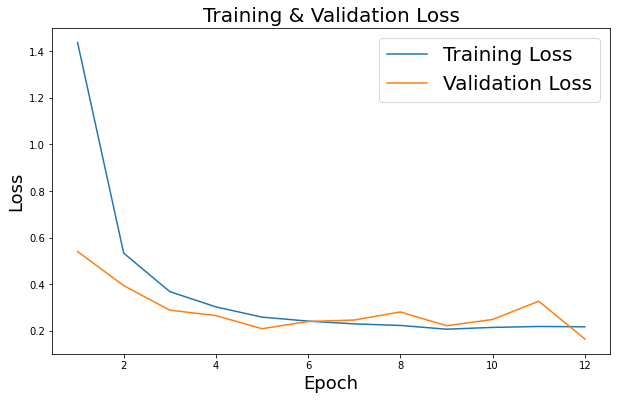

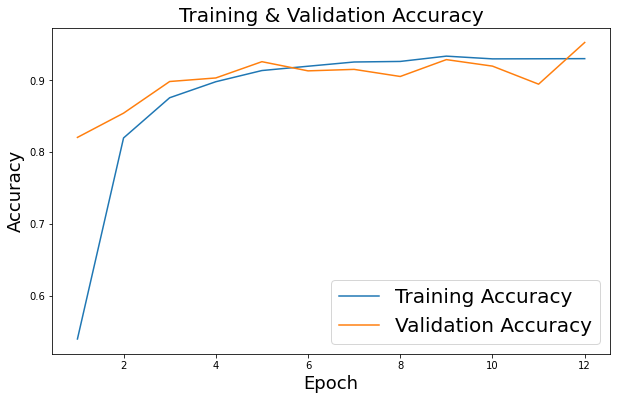

In [8]:
plt.figure(figsize=(10,6))
plt.plot(epoch,loss)
plt.plot(epoch,validation_loss)
plt.title('Training & Validation Loss',fontdict={'fontsize':20})
plt.xlabel('Epoch',fontdict={'fontsize':18})
plt.ylabel('Loss',fontdict={'fontsize':18})
plt.legend(['Training Loss','Validation Loss'],prop={'size':20})
plt.show()

plt.figure(figsize=(10,6))
plt.plot(epoch,accuracy)
plt.plot(epoch,validation_accuracy)
plt.title('Training & Validation Accuracy',fontdict={'fontsize':20})
plt.xlabel('Epoch',fontdict={'fontsize':18})
plt.ylabel('Accuracy',fontdict={'fontsize':18})
plt.legend(['Training Accuracy','Validation Accuracy'],prop={'size':20})
plt.show()

In [230]:
def predict_letter(image):
    
    reshaped_image = image.reshape((1,) + image.shape)
    class_probabilities = model.predict(reshaped_image)
    letter = alphabet[class_probabilities.argmax()]
    
    return letter

validation_images = []
validation_labels = []
predicted_labels = []

for tup in validation_data:  
    pics = len(tup[0])       
    for pic in range(pics):
        img = tup[0][pic]
        actual_label = alphabet[tup[1][pic].argmax()]
        predicted_label = predict_letter(img)
        
        validation_images.append(img)
        validation_labels.append(actual_label)
        predicted_labels.append(predicted_label) 
        
    if len(validation_images) >= 1500:
        break

In [232]:
predicted_letters = {}

for i in range(len(validation_images)):
    
    letter = predicted_labels[i]
    
    if letter not in predicted_letters.keys():
        predicted_letters.setdefault(letter,[[validation_images[i]],[validation_labels[i]]])
        
    elif letter in predicted_letters.keys():
        predicted_letters[letter][0].append(validation_images[i])
        predicted_letters[letter][1].append(validation_labels[i])

## Here, I use images from the validation set to write a sentence based on the model's predictions. The large letters above the images are the actual labels, with the predicted labels underneath.

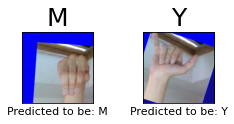

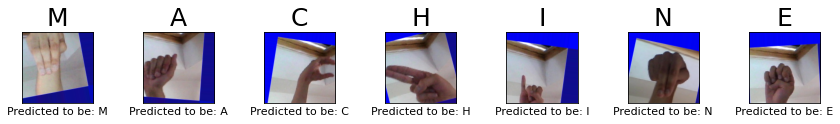

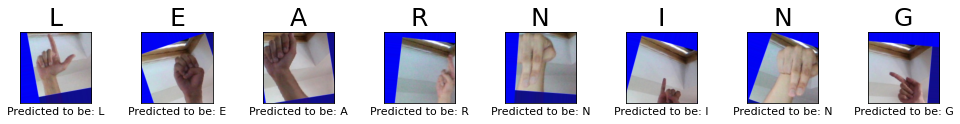

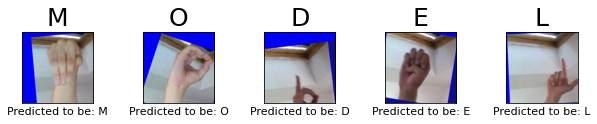

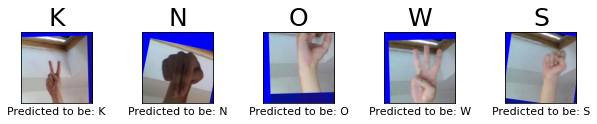

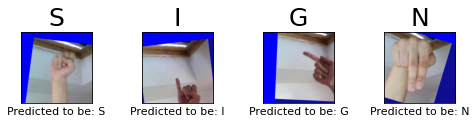

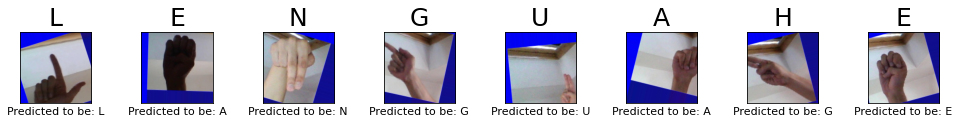

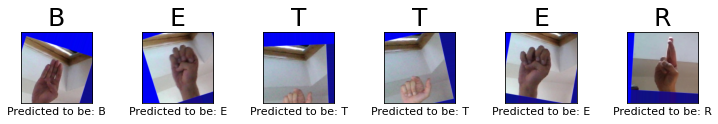

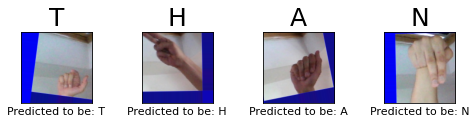

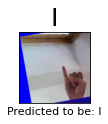

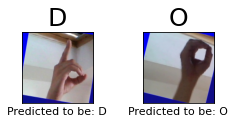

In [233]:
sentence = "My machine learning model knows sign language better than I do"
words = sentence.split()
longest_word_size = max([len(word) for word in words])

for word in words:
    fig = plt.figure(figsize=(17,17))
    word_length = len(word)
    for char in range(word_length):
        letter = word[char].upper()
        rand_num = random.randint(0,len(predicted_letters[letter][0])-1)
        img = predicted_letters[letter][0][rand_num]
        true_label = predicted_letters[letter][1][rand_num]
        
        fig.add_subplot(len(words),longest_word_size,char+1)
        plt.imshow(img)
        plt.title(true_label,fontdict={'fontsize':25})
        plt.xlabel('Predicted to be: '+str(letter),fontdict={'fontsize':11})
        plt.xticks(())
        plt.yticks(())
    plt.show()